In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

#root_path = './gdrive/MyDrive/DB_LARC/'

Mounted at /content/gdrive


In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Nadam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten, Input, Dense
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

In [3]:
from keras.applications import vgg16

img_rows = 150  
img_cols = 150

VGG16 = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

for layer in VGG16.layers:
  layer.trainable = False




58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
VGG16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
# Generating new images for the same object




from keras.preprocessing.image import ImageDataGenerator

train_data_dir = './gdrive/Shareddrives/DB-LARC/face-base/asian_tratado'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split = 0.25)

#validation_datagen = ImageDataGenerator(rescale=1./255)


train_batchsize = 18
val_batchsize = 20

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False,
        subset='validation')

Found 372 images belonging to 53 classes.
Found 115 images belonging to 53 classes.


In [5]:
num_classes = 53


inp = VGG16.output
inp = GlobalAveragePooling2D()(inp)


dense1 = Dense(512, activation= 'relu')(inp)
dense1 = Dropout(0.5)(dense1)
dense2 = Dense(64, activation= 'relu')(dense1)
dense2 = Dropout(0.1)(dense2)

out = Dense(num_classes, activation = 'softmax')(dense2)

model = Model(VGG16.input, out)
model.compile(optimizer = Nadam(lr = 0.0001) ,loss = 'categorical_crossentropy', metrics=['accuracy'])


In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [6]:
 #importing our optimizer

from keras.optimizers import RMSprop

A = model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

In [16]:
# Treino e save

epochs = 600
batch_size = 50

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size)

model.save('./gdrive/Shareddrives/DB-LARC/Modelos/asian-tratado_2Dense_VGG16.h5')

Epoch 1/600
7/7 [==============================] - 27s 4s/step - loss: 0.4234 - accuracy: 0.8651 - val_loss: 1.2147 - val_accuracy: 0.6000
Epoch 2/600
7/7 [==============================] - 21s 3s/step - loss: 0.6213 - accuracy: 0.7750 - val_loss: 1.4063 - val_accuracy: 0.6000
Epoch 3/600
7/7 [==============================] - 21s 3s/step - loss: 0.3286 - accuracy: 0.8968 - val_loss: 1.7019 - val_accuracy: 0.5750
Epoch 4/600
7/7 [==============================] - 21s 3s/step - loss: 0.2779 - accuracy: 0.9167 - val_loss: 1.1931 - val_accuracy: 0.7000
Epoch 5/600
7/7 [==============================] - 21s 3s/step - loss: 0.4593 - accuracy: 0.8413 - val_loss: 1.5349 - val_accuracy: 0.6250
Epoch 6/600
7/7 [==============================] - 21s 3s/step - loss: 0.4431 - accuracy: 0.8968 - val_loss: 1.9696 - val_accuracy: 0.4500
Epoch 7/600
7/7 [==============================] - 21s 3s/step - loss: 0.5175 - accuracy: 0.8500 - val_loss: 1.3040 - val_accuracy: 0.5750
Epoch 8/600
7/7 [==========

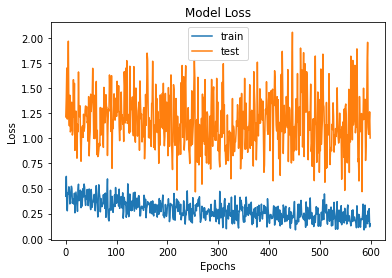

In [17]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

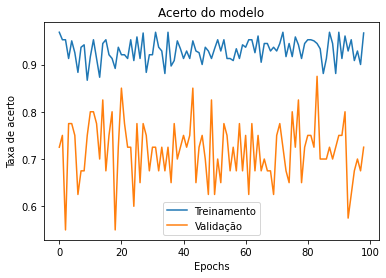

In [20]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'][500:599])
plt.plot(history.history['val_accuracy'][500:599])
plt.title('Acerto do modelo')
plt.ylabel('Taxa de acerto')
plt.xlabel('Epochs')
plt.legend(['Treinamento', 'Validação'])
plt.show()

In [21]:
history.history

{'accuracy': [0.8650793433189392,
  0.7749999761581421,
  0.89682537317276,
  0.9166666865348816,
  0.841269850730896,
  0.89682537317276,
  0.8500000238418579,
  0.8333333134651184,
  0.8833333253860474,
  0.8809523582458496,
  0.8500000238418579,
  0.8333333134651184,
  0.8583333492279053,
  0.8916666507720947,
  0.8809523582458496,
  0.8833333253860474,
  0.89682537317276,
  0.8492063283920288,
  0.925000011920929,
  0.8730158805847168,
  0.8730158805847168,
  0.8916666507720947,
  0.8809523582458496,
  0.9365079402923584,
  0.8333333134651184,
  0.8095238208770752,
  0.8809523582458496,
  0.8730158805847168,
  0.8492063283920288,
  0.875,
  0.920634925365448,
  0.8500000238418579,
  0.8888888955116272,
  0.8333333134651184,
  0.875,
  0.8571428656578064,
  0.8492063283920288,
  0.841269850730896,
  0.8809523582458496,
  0.920634925365448,
  0.8492063283920288,
  0.8583333492279053,
  0.8730158805847168,
  0.8650793433189392,
  0.8999999761581421,
  0.8253968358039856,
  0.857142865

In [23]:
a = {'accuracy': [0.8650793433189392,
  0.7749999761581421,
  0.89682537317276,
  0.9166666865348816,
  0.841269850730896,
  0.89682537317276,
  0.8500000238418579,
  0.8333333134651184,
  0.8833333253860474,
  0.8809523582458496,
  0.8500000238418579,
  0.8333333134651184,
  0.8583333492279053,
  0.8916666507720947,
  0.8809523582458496,
  0.8833333253860474,
  0.89682537317276,
  0.8492063283920288,
  0.925000011920929,
  0.8730158805847168,
  0.8730158805847168,
  0.8916666507720947,
  0.8809523582458496,
  0.9365079402923584,
  0.8333333134651184,
  0.8095238208770752,
  0.8809523582458496,
  0.8730158805847168,
  0.8492063283920288,
  0.875,
  0.920634925365448,
  0.8500000238418579,
  0.8888888955116272,
  0.8333333134651184,
  0.875,
  0.8571428656578064,
  0.8492063283920288,
  0.841269850730896,
  0.8809523582458496,
  0.920634925365448,
  0.8492063283920288,
  0.8583333492279053,
  0.8730158805847168,
  0.8650793433189392,
  0.8999999761581421,
  0.8253968358039856,
  0.8571428656578064,
  0.8333333134651184,
  0.9047619104385376,
  0.9047619104385376,
  0.8571428656578064,
  0.8730158805847168,
  0.8999999761581421,
  0.8999999761581421,
  0.8809523582458496,
  0.875,
  0.8492063283920288,
  0.8500000238418579,
  0.9047619104385376,
  0.875,
  0.8083333373069763,
  0.875,
  0.8809523582458496,
  0.9523809552192688,
  0.89682537317276,
  0.800000011920929,
  0.8253968358039856,
  0.8650793433189392,
  0.9333333373069763,
  0.8333333134651184,
  0.8650793433189392,
  0.9126983880996704,
  0.8833333253860474,
  0.8666666746139526,
  0.8333333134651184,
  0.9047619104385376,
  0.8416666388511658,
  0.8999999761581421,
  0.8492063283920288,
  0.925000011920929,
  0.9365079402923584,
  0.8571428656578064,
  0.8416666388511658,
  0.9166666865348816,
  0.9603174328804016,
  0.9603174328804016,
  0.920634925365448,
  0.9047619104385376,
  0.8571428656578064,
  0.8809523582458496,
  0.8666666746139526,
  0.8650793433189392,
  0.8809523582458496,
  0.920634925365448,
  0.8650793433189392,
  0.89682537317276,
  0.8583333492279053,
  0.8916666507720947,
  0.8333333134651184,
  0.8809523582458496,
  0.8416666388511658,
  0.8583333492279053,
  0.8730158805847168,
  0.8730158805847168,
  0.8809523582458496,
  0.8333333134651184,
  0.920634925365448,
  0.8492063283920288,
  0.8833333253860474,
  0.8333333134651184,
  0.8888888955116272,
  0.8833333253860474,
  0.8571428656578064,
  0.9285714030265808,
  0.9126983880996704,
  0.8583333492279053,
  0.8916666507720947,
  0.8809523582458496,
  0.8730158805847168,
  0.9666666388511658,
  0.9047619104385376,
  0.9126983880996704,
  0.8253968358039856,
  0.89682537317276,
  0.9444444179534912,
  0.8888888955116272,
  0.8650793433189392,
  0.8999999761581421,
  0.8916666507720947,
  0.9047619104385376,
  0.8492063283920288,
  0.9083333611488342,
  0.9166666865348816,
  0.8333333134651184,
  0.89682537317276,
  0.89682537317276,
  0.824999988079071,
  0.8492063283920288,
  0.8650793433189392,
  0.9126983880996704,
  0.875,
  0.8730158805847168,
  0.925000011920929,
  0.8916666507720947,
  0.8730158805847168,
  0.8730158805847168,
  0.9333333373069763,
  0.920634925365448,
  0.920634925365448,
  0.8888888955116272,
  0.89682537317276,
  0.8809523582458496,
  0.8916666507720947,
  0.9333333373069763,
  0.8650793433189392,
  0.8650793433189392,
  0.89682537317276,
  0.8809523582458496,
  0.925000011920929,
  0.925000011920929,
  0.9047619104385376,
  0.8833333253860474,
  0.8833333253860474,
  0.8583333492279053,
  0.8809523582458496,
  0.8809523582458496,
  0.9285714030265808,
  0.9047619104385376,
  0.8650793433189392,
  0.8833333253860474,
  0.925000011920929,
  0.8730158805847168,
  0.9285714030265808,
  0.9126983880996704,
  0.8888888955116272,
  0.8888888955116272,
  0.89682537317276,
  0.89682537317276,
  0.8999999761581421,
  0.9083333611488342,
  0.9416666626930237,
  0.9285714030265808,
  0.8730158805847168,
  0.920634925365448,
  0.8666666746139526,
  0.875,
  0.8888888955116272,
  0.9126983880996704,
  0.8999999761581421,
  0.920634925365448,
  0.875,
  0.8888888955116272,
  0.9083333611488342,
  0.89682537317276,
  0.9285714030265808,
  0.920634925365448,
  0.9047619104385376,
  0.9166666865348816,
  0.920634925365448,
  0.9126983880996704,
  0.8809523582458496,
  0.8650793433189392,
  0.8666666746139526,
  0.8730158805847168,
  0.9523809552192688,
  0.9333333373069763,
  0.8730158805847168,
  0.8999999761581421,
  0.8809523582458496,
  0.89682537317276,
  0.8571428656578064,
  0.9083333611488342,
  0.9333333373069763,
  0.8492063283920288,
  0.9126983880996704,
  0.9365079402923584,
  0.8809523582458496,
  0.8999999761581421,
  0.8730158805847168,
  0.875,
  0.8916666507720947,
  0.9126983880996704,
  0.8650793433189392,
  0.8833333253860474,
  0.89682537317276,
  0.9047619104385376,
  0.89682537317276,
  0.9444444179534912,
  0.9333333373069763,
  0.8888888955116272,
  0.920634925365448,
  0.9444444179534912,
  0.8916666507720947,
  0.89682537317276,
  0.920634925365448,
  0.9523809552192688,
  0.920634925365448,
  0.9365079402923584,
  0.8809523582458496,
  0.8571428656578064,
  0.9126983880996704,
  0.875,
  0.9166666865348816,
  0.9416666626930237,
  0.8999999761581421,
  0.875,
  0.9583333134651184,
  0.89682537317276,
  0.8916666507720947,
  0.9523809552192688,
  0.8916666507720947,
  0.9166666865348816,
  0.9285714030265808,
  0.9126983880996704,
  0.949999988079071,
  0.9285714030265808,
  0.920634925365448,
  0.9047619104385376,
  0.8333333134651184,
  0.9047619104385376,
  0.89682537317276,
  0.8888888955116272,
  0.8888888955116272,
  0.8730158805847168,
  0.9285714030265808,
  0.9603174328804016,
  0.9523809552192688,
  0.9333333373069763,
  0.8916666507720947,
  0.89682537317276,
  0.8833333253860474,
  0.875,
  0.9333333373069763,
  0.9047619104385376,
  0.8888888955116272,
  0.9416666626930237,
  0.9047619104385376,
  0.8888888955116272,
  0.9285714030265808,
  0.9047619104385376,
  0.9285714030265808,
  0.920634925365448,
  0.8888888955116272,
  0.949999988079071,
  0.9444444179534912,
  0.9047619104385376,
  0.9047619104385376,
  0.9365079402923584,
  0.9126983880996704,
  0.9333333373069763,
  0.9285714030265808,
  0.9365079402923584,
  0.9416666626930237,
  0.8809523582458496,
  0.8571428656578064,
  0.9166666865348816,
  0.9523809552192688,
  0.920634925365448,
  0.9126983880996704,
  0.8888888955116272,
  0.9603174328804016,
  0.8916666507720947,
  0.9666666388511658,
  0.841269850730896,
  0.8916666507720947,
  0.9285714030265808,
  0.8500000238418579,
  0.9416666626930237,
  0.9126983880996704,
  0.9666666388511658,
  0.9047619104385376,
  0.9416666626930237,
  0.8809523582458496,
  0.8833333253860474,
  0.89682537317276,
  0.9126983880996704,
  0.9682539701461792,
  0.89682537317276,
  0.9365079402923584,
  0.920634925365448,
  0.9444444179534912,
  0.8833333253860474,
  0.9365079402923584,
  0.9126983880996704,
  0.9285714030265808,
  0.89682537317276,
  0.8833333253860474,
  0.9603174328804016,
  0.949999988079071,
  0.9285714030265808,
  0.89682537317276,
  0.920634925365448,
  0.9365079402923584,
  0.8650793433189392,
  0.949999988079071,
  0.89682537317276,
  0.925000011920929,
  0.8666666746139526,
  0.9365079402923584,
  0.9603174328804016,
  0.976190447807312,
  0.925000011920929,
  0.8888888955116272,
  0.8730158805847168,
  0.9166666865348816,
  0.9047619104385376,
  0.8999999761581421,
  0.9047619104385376,
  0.8999999761581421,
  0.9285714030265808,
  0.9285714030265808,
  0.925000011920929,
  0.9523809552192688,
  0.8730158805847168,
  0.9523809552192688,
  0.8809523582458496,
  0.8833333253860474,
  0.9285714030265808,
  0.8809523582458496,
  0.9444444179534912,
  0.920634925365448,
  0.8888888955116272,
  0.9083333611488342,
  0.9444444179534912,
  0.9285714030265808,
  0.875,
  0.9583333134651184,
  0.9523809552192688,
  0.9285714030265808,
  0.9444444179534912,
  0.9285714030265808,
  0.920634925365448,
  0.9285714030265808,
  0.89682537317276,
  0.9333333373069763,
  0.9126983880996704,
  0.976190447807312,
  0.8809523582458496,
  0.9166666865348816,
  0.9523809552192688,
  0.8666666746139526,
  0.9416666626930237,
  0.9583333134651184,
  0.9285714030265808,
  0.9166666865348816,
  0.9047619104385376,
  0.9444444179534912,
  0.9166666865348816,
  0.925000011920929,
  0.925000011920929,
  0.8888888955116272,
  0.8916666507720947,
  0.9365079402923584,
  0.9365079402923584,
  0.8999999761581421,
  0.920634925365448,
  0.9583333134651184,
  0.9126983880996704,
  0.89682537317276,
  0.9285714030265808,
  0.9523809552192688,
  0.9333333373069763,
  0.9126983880996704,
  0.9126983880996704,
  0.9444444179534912,
  0.9583333134651184,
  0.9523809552192688,
  0.9444444179534912,
  0.9083333611488342,
  0.9285714030265808,
  0.920634925365448,
  0.9603174328804016,
  0.9444444179534912,
  0.920634925365448,
  0.920634925365448,
  0.9285714030265808,
  0.9444444179534912,
  0.9365079402923584,
  0.89682537317276,
  0.920634925365448,
  0.9333333373069763,
  0.9047619104385376,
  0.9416666626930237,
  0.920634925365448,
  0.9365079402923584,
  0.9603174328804016,
  0.920634925365448,
  0.9365079402923584,
  0.8809523582458496,
  0.9126983880996704,
  0.920634925365448,
  0.9365079402923584,
  0.8888888955116272,
  0.8730158805847168,
  0.9523809552192688,
  0.9444444179534912,
  0.9365079402923584,
  0.925000011920929,
  0.9444444179534912,
  0.9047619104385376,
  0.8730158805847168,
  0.9444444179534912,
  0.976190447807312,
  0.9083333611488342,
  0.9285714030265808,
  0.949999988079071,
  0.89682537317276,
  0.925000011920929,
  0.9126983880996704,
  0.9047619104385376,
  0.8888888955116272,
  0.9444444179534912,
  0.9603174328804016,
  0.920634925365448,
  0.9682539701461792,
  0.9523809552192688,
  0.9126983880996704,
  0.8999999761581421,
  0.9583333134651184,
  0.9126983880996704,
  0.9126983880996704,
  0.9285714030265808,
  0.8999999761581421,
  0.8650793433189392,
  0.9285714030265808,
  0.9333333373069763,
  0.920634925365448,
  0.9166666865348816,
  0.9444444179534912,
  0.9047619104385376,
  0.9166666865348816,
  0.9416666626930237,
  0.9583333134651184,
  0.8809523582458496,
  0.9126983880996704,
  0.9523809552192688,
  0.89682537317276,
  0.9583333134651184,
  0.925000011920929,
  0.9603174328804016,
  0.9126983880996704,
  0.9083333611488342,
  0.9285714030265808,
  0.920634925365448,
  0.89682537317276,
  0.9444444179534912,
  0.89682537317276,
  0.920634925365448,
  0.9666666388511658,
  0.9444444179534912,
  0.89682537317276,
  0.9365079402923584,
  0.9285714030265808,
  0.9083333611488342,
  0.9365079402923584,
  0.9285714030265808,
  0.9166666865348816,
  0.9523809552192688,
  0.9047619104385376,
  0.9523809552192688,
  0.9682539701461792,
  0.9523809552192688,
  0.9523809552192688,
  0.9126983880996704,
  0.949999988079071,
  0.925000011920929,
  0.8833333253860474,
  0.9365079402923584,
  0.9416666626930237,
  0.8666666746139526,
  0.9166666865348816,
  0.9523809552192688,
  0.9126983880996704,
  0.8730158805847168,
  0.9444444179534912,
  0.9523809552192688,
  0.920634925365448,
  0.9126983880996704,
  0.8916666507720947,
  0.9365079402923584,
  0.920634925365448,
  0.920634925365448,
  0.9126983880996704,
  0.9523809552192688,
  0.9083333611488342,
  0.9583333134651184,
  0.9126983880996704,
  0.9666666388511658,
  0.8833333253860474,
  0.920634925365448,
  0.920634925365448,
  0.9682539701461792,
  0.9365079402923584,
  0.9285714030265808,
  0.8809523582458496,
  0.9682539701461792,
  0.89682537317276,
  0.9083333611488342,
  0.949999988079071,
  0.9333333373069763,
  0.9126983880996704,
  0.9285714030265808,
  0.9126983880996704,
  0.949999988079071,
  0.9285714030265808,
  0.925000011920929,
  0.8999999761581421,
  0.9365079402923584,
  0.9285714030265808,
  0.9126983880996704,
  0.9333333373069763,
  0.9523809552192688,
  0.9285714030265808,
  0.9523809552192688,
  0.9126983880996704,
  0.9126983880996704,
  0.9083333611488342,
  0.9333333373069763,
  0.9126983880996704,
  0.9416666626930237,
  0.9365079402923584,
  0.9523809552192688,
  0.9523809552192688,
  0.925000011920929,
  0.9603174328804016,
  0.9047619104385376,
  0.9444444179534912,
  0.9444444179534912,
  0.9285714030265808,
  0.9365079402923584,
  0.9285714030265808,
  0.9444444179534912,
  0.9682539701461792,
  0.9166666865348816,
  0.9444444179534912,
  0.9166666865348816,
  0.9583333134651184,
  0.9416666626930237,
  0.9126983880996704,
  0.9444444179534912,
  0.9523809552192688,
  0.9523809552192688,
  0.949999988079071,
  0.9444444179534912,
  0.9333333373069763,
  0.8809523582458496,
  0.9126983880996704,
  0.9682539701461792,
  0.9444444179534912,
  0.8809523582458496,
  0.9682539701461792,
  0.9126983880996704,
  0.9603174328804016,
  0.9285714030265808,
  0.9523809552192688,
  0.9083333611488342,
  0.9285714030265808,
  0.8999999761581421,
  0.9666666388511658,
  0.9444444179534912],
 'loss': [0.4234221577644348,
  0.6213465332984924,
  0.32856738567352295,
  0.2778726816177368,
  0.4593072235584259,
  0.4430846571922302,
  0.5174813866615295,
  0.5015725493431091,
  0.3469711244106293,
  0.3914952576160431,
  0.4469009339809418,
  0.5227400064468384,
  0.502034604549408,
  0.35314029455184937,
  0.3965236246585846,
  0.3736680746078491,
  0.3442651033401489,
  0.4537675678730011,
  0.25785186886787415,
  0.36390408873558044,
  0.4647987484931946,
  0.40898117423057556,
  0.35491102933883667,
  0.2721436321735382,
  0.48897823691368103,
  0.5432308316230774,
  0.3786720633506775,
  0.4181446135044098,
  0.4791243076324463,
  0.483438104391098,
  0.3092665672302246,
  0.4705565571784973,
  0.32437124848365784,
  0.42100563645362854,
  0.499565988779068,
  0.41674697399139404,
  0.5449867844581604,
  0.5141407251358032,
  0.3836851716041565,
  0.3318220376968384,
  0.4295239746570587,
  0.3960840404033661,
  0.49045872688293457,
  0.4235179126262665,
  0.33002471923828125,
  0.4240615963935852,
  0.4959965646266937,
  0.43629688024520874,
  0.33003002405166626,
  0.2900483310222626,
  0.4908405840396881,
  0.40595299005508423,
  0.3139471113681793,
  0.3690856993198395,
  0.366939902305603,
  0.4027502238750458,
  0.4418084919452667,
  0.4012027084827423,
  0.278369665145874,
  0.3988420367240906,
  0.5294453501701355,
  0.37670764327049255,
  0.3477185070514679,
  0.21636632084846497,
  0.42708277702331543,
  0.5372738242149353,
  0.4537004828453064,
  0.41963958740234375,
  0.26766377687454224,
  0.40077656507492065,
  0.36469709873199463,
  0.31914812326431274,
  0.33337557315826416,
  0.3436891734600067,
  0.43826329708099365,
  0.3552844524383545,
  0.44402042031288147,
  0.30146244168281555,
  0.45470118522644043,
  0.21300669014453888,
  0.3257857859134674,
  0.43623191118240356,
  0.5959148406982422,
  0.26420384645462036,
  0.19396533071994781,
  0.17688755691051483,
  0.29706451296806335,
  0.29105380177497864,
  0.4829786419868469,
  0.2841387987136841,
  0.4090207517147064,
  0.4217943847179413,
  0.30829527974128723,
  0.26236680150032043,
  0.3204222321510315,
  0.35245853662490845,
  0.4358627498149872,
  0.32158368825912476,
  0.5102085471153259,
  0.3699301779270172,
  0.3533075153827667,
  0.43715736269950867,
  0.3654536008834839,
  0.3994807004928589,
  0.3252418339252472,
  0.49435266852378845,
  0.3020065128803253,
  0.3926220238208771,
  0.37023869156837463,
  0.42005011439323425,
  0.3423602879047394,
  0.30423781275749207,
  0.45729750394821167,
  0.2040301114320755,
  0.26809006929397583,
  0.4115898907184601,
  0.36674943566322327,
  0.3408004939556122,
  0.36652544140815735,
  0.21310101449489594,
  0.2480974644422531,
  0.24814924597740173,
  0.5467140674591064,
  0.40839916467666626,
  0.2196221649646759,
  0.3523007929325104,
  0.4451008141040802,
  0.28286778926849365,
  0.3603360056877136,
  0.2788379192352295,
  0.37543389201164246,
  0.2830613851547241,
  0.3694412410259247,
  0.45753175020217896,
  0.3650384247303009,
  0.27436867356300354,
  0.46358948945999146,
  0.38373860716819763,
  0.3577483594417572,
  0.294888973236084,
  0.40440693497657776,
  0.3339543640613556,
  0.31293731927871704,
  0.42237430810928345,
  0.42944467067718506,
  0.3560182452201843,
  0.22611328959465027,
  0.2302703857421875,
  0.30180543661117554,
  0.32373350858688354,
  0.30264922976493835,
  0.3218418061733246,
  0.31116971373558044,
  0.28240108489990234,
  0.43329259753227234,
  0.40456703305244446,
  0.30825191736221313,
  0.39179903268814087,
  0.20890985429286957,
  0.2990526854991913,
  0.32110321521759033,
  0.3699698746204376,
  0.3584936261177063,
  0.33964887261390686,
  0.3557266294956207,
  0.3481706976890564,
  0.25542256236076355,
  0.3096298277378082,
  0.3705572485923767,
  0.33876344561576843,
  0.24669763445854187,
  0.37653011083602905,
  0.2539181411266327,
  0.22707003355026245,
  0.34002429246902466,
  0.34053418040275574,
  0.2642820179462433,
  0.3430004417896271,
  0.29426154494285583,
  0.32806268334388733,
  0.2148076444864273,
  0.2928116023540497,
  0.33937546610832214,
  0.2429748773574829,
  0.4002397656440735,
  0.28877705335617065,
  0.378292977809906,
  0.26955708861351013,
  0.2811131179332733,
  0.34311002492904663,
  0.3740153908729553,
  0.43529582023620605,
  0.23029322922229767,
  0.25867801904678345,
  0.20876316726207733,
  0.24633389711380005,
  0.34113991260528564,
  0.2822204530239105,
  0.22227121889591217,
  0.2501817047595978,
  0.3349546492099762,
  0.3346284329891205,
  0.39813676476478577,
  0.3243376314640045,
  0.16997946798801422,
  0.20898129045963287,
  0.3513524532318115,
  0.33774635195732117,
  0.33993440866470337,
  0.33893269300460815,
  0.3042612373828888,
  0.21529793739318848,
  0.19066749513149261,
  0.4506339430809021,
  0.3067585527896881,
  0.18431320786476135,
  0.3142782747745514,
  0.3074904978275299,
  0.3962107002735138,
  0.3307648003101349,
  0.38202449679374695,
  0.2711983919143677,
  0.3672891855239868,
  0.2947033643722534,
  0.3002926707267761,
  0.24239347875118256,
  0.3438137173652649,
  0.1877492517232895,
  0.2249990552663803,
  0.2547469139099121,
  0.23909474909305573,
  0.23050811886787415,
  0.37719154357910156,
  0.2964312732219696,
  0.2779673635959625,
  0.14533290266990662,
  0.2324935793876648,
  0.23698942363262177,
  0.3634871244430542,
  0.47662353515625,
  0.2840101718902588,
  0.33694151043891907,
  0.2562354505062103,
  0.1859700083732605,
  0.27691686153411865,
  0.3518441915512085,
  0.17001447081565857,
  0.240010067820549,
  0.2970791459083557,
  0.15667763352394104,
  0.4091056287288666,
  0.27111393213272095,
  0.24925976991653442,
  0.24705570936203003,
  0.2239142805337906,
  0.3374956548213959,
  0.32186993956565857,
  0.27781566977500916,
  0.3508121073246002,
  0.32249489426612854,
  0.3601815700531006,
  0.3938194811344147,
  0.3246695101261139,
  0.417911171913147,
  0.2723301351070404,
  0.1637539118528366,
  0.18650880455970764,
  0.2098526507616043,
  0.32341358065605164,
  0.29660913348197937,
  0.27662721276283264,
  0.3046064078807831,
  0.20587654411792755,
  0.30792275071144104,
  0.2616938352584839,
  0.18438281118869781,
  0.2408118098974228,
  0.27119162678718567,
  0.24342478811740875,
  0.2808096706867218,
  0.26882895827293396,
  0.297617107629776,
  0.2817591726779938,
  0.22027984261512756,
  0.1756141185760498,
  0.28752148151397705,
  0.3425620198249817,
  0.22405950725078583,
  0.23505498468875885,
  0.26841601729393005,
  0.2283458411693573,
  0.23814642429351807,
  0.22041164338588715,
  0.3820989429950714,
  0.38063982129096985,
  0.2886093258857727,
  0.16966207325458527,
  0.29401031136512756,
  0.21762777864933014,
  0.2693224549293518,
  0.19460545480251312,
  0.2912793457508087,
  0.14739689230918884,
  0.471786767244339,
  0.35688316822052,
  0.207086980342865,
  0.35140323638916016,
  0.2234996110200882,
  0.23015978932380676,
  0.10986818373203278,
  0.3090161979198456,
  0.22129863500595093,
  0.37539607286453247,
  0.3996143043041229,
  0.30768609046936035,
  0.2627500891685486,
  0.09865142405033112,
  0.28294599056243896,
  0.21635499596595764,
  0.327833890914917,
  0.19629958271980286,
  0.35307466983795166,
  0.23346903920173645,
  0.25664135813713074,
  0.22365409135818481,
  0.25302499532699585,
  0.4140831530094147,
  0.15780676901340485,
  0.14722922444343567,
  0.2816576361656189,
  0.26852142810821533,
  0.18381746113300323,
  0.15091048181056976,
  0.4276345670223236,
  0.19322210550308228,
  0.3105637729167938,
  0.18082503974437714,
  0.3350784182548523,
  0.22488754987716675,
  0.14442667365074158,
  0.10610903799533844,
  0.2778823673725128,
  0.27122002840042114,
  0.412697970867157,
  0.29693081974983215,
  0.3828190863132477,
  0.34402593970298767,
  0.2766864597797394,
  0.31782370805740356,
  0.18898548185825348,
  0.16478832066059113,
  0.2241826355457306,
  0.16662894189357758,
  0.3398591876029968,
  0.22055640816688538,
  0.41530561447143555,
  0.3252914547920227,
  0.24371205270290375,
  0.30585840344429016,
  0.2322460114955902,
  0.24132756888866425,
  0.3442952334880829,
  0.2548452317714691,
  0.273567259311676,
  0.23896817862987518,
  0.3639947474002838,
  0.1686784327030182,
  0.13994447886943817,
  0.26269978284835815,
  0.15355584025382996,
  0.2954944968223572,
  0.21650904417037964,
  0.22631803154945374,
  0.30872035026550293,
  0.20412974059581757,
  0.24250634014606476,
  0.11566011607646942,
  0.31932738423347473,
  0.2803553342819214,
  0.23690533638000488,
  0.3337341248989105,
  0.19725370407104492,
  0.17300374805927277,
  0.2560589909553528,
  0.24962209165096283,
  0.3445056676864624,
  0.23429818451404572,
  0.19615159928798676,
  0.2633376717567444,
  0.2539609372615814,
  0.3324037492275238,
  0.27122262120246887,
  0.250883013010025,
  0.31761670112609863,
  0.27282896637916565,
  0.25756800174713135,
  0.11605515331029892,
  0.3980831503868103,
  0.29778775572776794,
  0.24611443281173706,
  0.16882851719856262,
  0.15311174094676971,
  0.23591485619544983,
  0.24108929932117462,
  0.238581120967865,
  0.2001064270734787,
  0.21501846611499786,
  0.20604221522808075,
  0.24189867079257965,
  0.3273147940635681,
  0.3218473494052887,
  0.13549171388149261,
  0.17322938144207,
  0.2577976584434509,
  0.31538861989974976,
  0.2697767913341522,
  0.1862485557794571,
  0.24828699231147766,
  0.3233712911605835,
  0.20933060348033905,
  0.1683136522769928,
  0.2864346504211426,
  0.12791359424591064,
  0.2539898753166199,
  0.24685528874397278,
  0.14251843094825745,
  0.23032182455062866,
  0.20795613527297974,
  0.33606991171836853,
  0.31423649191856384,
  0.2412201166152954,
  0.16924025118350983,
  0.3024349808692932,
  0.3229190409183502,
  0.1934695839881897,
  0.1748805195093155,
  0.23288097977638245,
  0.20876407623291016,
  0.19308453798294067,
  0.24415872991085052,
  0.3090246617794037,
  0.17205823957920074,
  0.10479652881622314,
  0.2677367031574249,
  0.15496253967285156,
  0.19689355790615082,
  0.2296231985092163,
  0.20763951539993286,
  0.2512041926383972,
  0.2816227674484253,
  0.3706105649471283,
  0.15878163278102875,
  0.0879528746008873,
  0.18100154399871826,
  0.1436924785375595,
  0.14771589636802673,
  0.23516705632209778,
  0.34205806255340576,
  0.1677253097295761,
  0.3447943329811096,
  0.21950078010559082,
  0.21561941504478455,
  0.25594010949134827,
  0.3818352520465851,
  0.26241335272789,
  0.22877942025661469,
  0.2144087553024292,
  0.20290058851242065,
  0.1936853677034378,
  0.25524961948394775,
  0.18144649267196655,
  0.2344224452972412,
  0.11352235823869705,
  0.36658975481987,
  0.2690434455871582,
  0.13476639986038208,
  0.31269410252571106,
  0.23192578554153442,
  0.24170376360416412,
  0.1948719620704651,
  0.2827715277671814,
  0.40629538893699646,
  0.23419280350208282,
  0.19877292215824127,
  0.2608550786972046,
  0.14342153072357178,
  0.22630837559700012,
  0.21730053424835205,
  0.1207522451877594,
  0.1989789754152298,
  0.23259398341178894,
  0.16114985942840576,
  0.24308624863624573,
  0.3196485936641693,
  0.2621631920337677,
  0.24348585307598114,
  0.30708643794059753,
  0.12453456968069077,
  0.24560292065143585,
  0.17606839537620544,
  0.13018684089183807,
  0.12284325808286667,
  0.13118743896484375,
  0.2638738453388214,
  0.18399931490421295,
  0.2432461529970169,
  0.38712045550346375,
  0.19912534952163696,
  0.19106020033359528,
  0.44614848494529724,
  0.2857818007469177,
  0.27295151352882385,
  0.25540921092033386,
  0.34054210782051086,
  0.18543609976768494,
  0.14452043175697327,
  0.25674423575401306,
  0.27226442098617554,
  0.2906290888786316,
  0.17429029941558838,
  0.2712225615978241,
  0.18780159950256348,
  0.3153836131095886,
  0.126891627907753,
  0.2838132679462433,
  0.1310632973909378,
  0.2586880028247833,
  0.19623582065105438,
  0.3624448776245117,
  0.21858946979045868,
  0.19216836988925934,
  0.09390982985496521,
  0.2290199249982834,
  0.2757514417171478,
  0.36954763531684875,
  0.09495440870523453,
  0.28452569246292114,
  0.24952025711536407,
  0.173507958650589,
  0.2814732789993286,
  0.28640007972717285,
  0.1593102067708969,
  0.32921767234802246,
  0.1393195539712906,
  0.24277068674564362,
  0.18558059632778168,
  0.2675269544124603,
  0.22486205399036407,
  0.15676219761371613,
  0.30314648151397705,
  0.1835775077342987,
  0.23317185044288635,
  0.18782512843608856,
  0.14648959040641785,
  0.29064932465553284,
  0.3363451659679413,
  0.17570087313652039,
  0.20866459608078003,
  0.2279244363307953,
  0.17534345388412476,
  0.1634792685508728,
  0.12804941833019257,
  0.16894088685512543,
  0.28011104464530945,
  0.17125408351421356,
  0.2873438000679016,
  0.1777152717113495,
  0.1851901113986969,
  0.21671119332313538,
  0.19542339444160461,
  0.17001475393772125,
  0.17071491479873657,
  0.10869520902633667,
  0.32778412103652954,
  0.21471065282821655,
  0.2433328777551651,
  0.11143942177295685,
  0.24054482579231262,
  0.21653078496456146,
  0.14705988764762878,
  0.11482202261686325,
  0.1974675953388214,
  0.19769588112831116,
  0.18926581740379333,
  0.23160701990127563,
  0.3445156514644623,
  0.23410484194755554,
  0.0873560905456543,
  0.14308325946331024,
  0.3345712125301361,
  0.11008895188570023,
  0.23328739404678345,
  0.1946495920419693,
  0.15849669277668,
  0.14954574406147003,
  0.277291476726532,
  0.1763727068901062,
  0.2997712790966034,
  0.11795653402805328,
  0.14690400660037994],
 'val_accuracy': [0.6000000238418579,
  0.6000000238418579,
  0.574999988079071,
  0.699999988079071,
  0.625,
  0.44999998807907104,
  0.574999988079071,
  0.675000011920929,
  0.5249999761581421,
  0.6000000238418579,
  0.675000011920929,
  0.625,
  0.5249999761581421,
  0.7250000238418579,
  0.6499999761581421,
  0.6000000238418579,
  0.6000000238418579,
  0.4749999940395355,
  0.7749999761581421,
  0.699999988079071,
  0.675000011920929,
  0.6499999761581421,
  0.75,
  0.6499999761581421,
  0.625,
  0.6499999761581421,
  0.6499999761581421,
  0.625,
  0.574999988079071,
  0.7250000238418579,
  0.6499999761581421,
  0.7250000238418579,
  0.800000011920929,
  0.699999988079071,
  0.699999988079071,
  0.699999988079071,
  0.699999988079071,
  0.675000011920929,
  0.699999988079071,
  0.574999988079071,
  0.550000011920929,
  0.6499999761581421,
  0.699999988079071,
  0.7250000238418579,
  0.7749999761581421,
  0.574999988079071,
  0.800000011920929,
  0.6499999761581421,
  0.699999988079071,
  0.625,
  0.6499999761581421,
  0.625,
  0.5249999761581421,
  0.5249999761581421,
  0.625,
  0.6499999761581421,
  0.625,
  0.675000011920929,
  0.675000011920929,
  0.550000011920929,
  0.6000000238418579,
  0.824999988079071,
  0.675000011920929,
  0.7250000238418579,
  0.675000011920929,
  0.7250000238418579,
  0.675000011920929,
  0.7250000238418579,
  0.6499999761581421,
  0.675000011920929,
  0.75,
  0.675000011920929,
  0.625,
  0.675000011920929,
  0.7250000238418579,
  0.6499999761581421,
  0.6000000238418579,
  0.625,
  0.6499999761581421,
  0.6499999761581421,
  0.675000011920929,
  0.574999988079071,
  0.699999988079071,
  0.699999988079071,
  0.6499999761581421,
  0.675000011920929,
  0.574999988079071,
  0.625,
  0.6499999761581421,
  0.6499999761581421,
  0.6499999761581421,
  0.824999988079071,
  0.675000011920929,
  0.675000011920929,
  0.699999988079071,
  0.574999988079071,
  0.675000011920929,
  0.675000011920929,
  0.6000000238418579,
  0.6499999761581421,
  0.6499999761581421,
  0.6499999761581421,
  0.6499999761581421,
  0.6499999761581421,
  0.550000011920929,
  0.574999988079071,
  0.7250000238418579,
  0.6000000238418579,
  0.7250000238418579,
  0.6499999761581421,
  0.699999988079071,
  0.625,
  0.6499999761581421,
  0.675000011920929,
  0.6499999761581421,
  0.574999988079071,
  0.625,
  0.7250000238418579,
  0.550000011920929,
  0.6000000238418579,
  0.6499999761581421,
  0.699999988079071,
  0.7250000238418579,
  0.7250000238418579,
  0.6000000238418579,
  0.675000011920929,
  0.4749999940395355,
  0.699999988079071,
  0.675000011920929,
  0.675000011920929,
  0.699999988079071,
  0.6499999761581421,
  0.699999988079071,
  0.699999988079071,
  0.6000000238418579,
  0.6499999761581421,
  0.675000011920929,
  0.699999988079071,
  0.625,
  0.6499999761581421,
  0.6499999761581421,
  0.6499999761581421,
  0.625,
  0.625,
  0.6499999761581421,
  0.7749999761581421,
  0.625,
  0.625,
  0.699999988079071,
  0.699999988079071,
  0.699999988079071,
  0.625,
  0.7250000238418579,
  0.675000011920929,
  0.6499999761581421,
  0.7749999761581421,
  0.7749999761581421,
  0.550000011920929,
  0.675000011920929,
  0.675000011920929,
  0.625,
  0.625,
  0.675000011920929,
  0.6499999761581421,
  0.6499999761581421,
  0.699999988079071,
  0.7250000238418579,
  0.7250000238418579,
  0.800000011920929,
  0.675000011920929,
  0.699999988079071,
  0.6000000238418579,
  0.625,
  0.7250000238418579,
  0.675000011920929,
  0.675000011920929,
  0.699999988079071,
  0.625,
  0.625,
  0.625,
  0.699999988079071,
  0.675000011920929,
  0.625,
  0.75,
  0.675000011920929,
  0.75,
  0.6499999761581421,
  0.675000011920929,
  0.675000011920929,
  0.6499999761581421,
  0.625,
  0.75,
  0.5249999761581421,
  0.574999988079071,
  0.6499999761581421,
  0.699999988079071,
  0.6000000238418579,
  0.7250000238418579,
  0.675000011920929,
  0.6499999761581421,
  0.625,
  0.699999988079071,
  0.6000000238418579,
  0.6499999761581421,
  0.7749999761581421,
  0.625,
  0.6000000238418579,
  0.550000011920929,
  0.6499999761581421,
  0.7749999761581421,
  0.75,
  0.699999988079071,
  0.6499999761581421,
  0.5249999761581421,
  0.675000011920929,
  0.75,
  0.675000011920929,
  0.625,
  0.7250000238418579,
  0.875,
  0.675000011920929,
  0.675000011920929,
  0.699999988079071,
  0.6499999761581421,
  0.675000011920929,
  0.699999988079071,
  0.699999988079071,
  0.675000011920929,
  0.7250000238418579,
  0.6499999761581421,
  0.7250000238418579,
  0.675000011920929,
  0.6000000238418579,
  0.7749999761581421,
  0.75,
  0.675000011920929,
  0.6499999761581421,
  0.7749999761581421,
  0.7250000238418579,
  0.6000000238418579,
  0.675000011920929,
  0.699999988079071,
  0.7749999761581421,
  0.800000011920929,
  0.824999988079071,
  0.7250000238418579,
  0.7250000238418579,
  0.75,
  0.75,
  0.7250000238418579,
  0.675000011920929,
  0.7250000238418579,
  0.675000011920929,
  0.625,
  0.6000000238418579,
  0.8500000238418579,
  0.699999988079071,
  0.7250000238418579,
  0.675000011920929,
  0.7749999761581421,
  0.5249999761581421,
  0.6499999761581421,
  0.7749999761581421,
  0.699999988079071,
  0.75,
  0.7250000238418579,
  0.75,
  0.625,
  0.7749999761581421,
  0.7250000238418579,
  0.699999988079071,
  0.625,
  0.699999988079071,
  0.6499999761581421,
  0.699999988079071,
  0.75,
  0.675000011920929,
  0.699999988079071,
  0.699999988079071,
  0.7250000238418579,
  0.675000011920929,
  0.75,
  0.7250000238418579,
  0.7250000238418579,
  0.675000011920929,
  0.7749999761581421,
  0.675000011920929,
  0.625,
  0.6499999761581421,
  0.699999988079071,
  0.675000011920929,
  0.574999988079071,
  0.699999988079071,
  0.675000011920929,
  0.75,
  0.675000011920929,
  0.7250000238418579,
  0.675000011920929,
  0.7250000238418579,
  0.675000011920929,
  0.7250000238418579,
  0.800000011920929,
  0.824999988079071,
  0.75,
  0.699999988079071,
  0.699999988079071,
  0.7250000238418579,
  0.699999988079071,
  0.6499999761581421,
  0.699999988079071,
  0.6000000238418579,
  0.6499999761581421,
  0.675000011920929,
  0.800000011920929,
  0.699999988079071,
  0.8500000238418579,
  0.699999988079071,
  0.875,
  0.7749999761581421,
  0.7250000238418579,
  0.75,
  0.7250000238418579,
  0.699999988079071,
  0.675000011920929,
  0.7250000238418579,
  0.824999988079071,
  0.75,
  0.7250000238418579,
  0.675000011920929,
  0.7250000238418579,
  0.7250000238418579,
  0.75,
  0.7250000238418579,
  0.7749999761581421,
  0.699999988079071,
  0.625,
  0.6499999761581421,
  0.675000011920929,
  0.675000011920929,
  0.625,
  0.7749999761581421,
  0.699999988079071,
  0.699999988079071,
  0.675000011920929,
  0.7749999761581421,
  0.7749999761581421,
  0.6499999761581421,
  0.824999988079071,
  0.675000011920929,
  0.7250000238418579,
  0.75,
  0.625,
  0.5249999761581421,
  0.7250000238418579,
  0.7250000238418579,
  0.625,
  0.6499999761581421,
  0.6499999761581421,
  0.7749999761581421,
  0.7250000238418579,
  0.800000011920929,
  0.7749999761581421,
  0.6000000238418579,
  0.699999988079071,
  0.675000011920929,
  0.625,
  0.699999988079071,
  0.75,
  0.6499999761581421,
  0.7749999761581421,
  0.699999988079071,
  0.625,
  0.625,
  0.7250000238418579,
  0.7250000238418579,
  0.7749999761581421,
  0.7250000238418579,
  0.625,
  0.75,
  0.7749999761581421,
  0.7250000238418579,
  0.7250000238418579,
  0.6499999761581421,
  0.5249999761581421,
  0.625,
  0.699999988079071,
  0.675000011920929,
  0.699999988079071,
  0.75,
  0.75,
  0.8500000238418579,
  0.7250000238418579,
  0.7250000238418579,
  0.7250000238418579,
  0.6499999761581421,
  0.6499999761581421,
  0.675000011920929,
  0.7250000238418579,
  0.7749999761581421,
  0.675000011920929,
  0.675000011920929,
  0.625,
  0.800000011920929,
  0.800000011920929,
  0.699999988079071,
  0.6499999761581421,
  0.699999988079071,
  0.699999988079071,
  0.800000011920929,
  0.625,
  0.699999988079071,
  0.699999988079071,
  0.699999988079071,
  0.675000011920929,
  0.8500000238418579,
  0.75,
  0.625,
  0.7250000238418579,
  0.625,
  0.800000011920929,
  0.7749999761581421,
  0.75,
  0.824999988079071,
  0.7250000238418579,
  0.699999988079071,
  0.675000011920929,
  0.625,
  0.6499999761581421,
  0.7749999761581421,
  0.6499999761581421,
  0.675000011920929,
  0.699999988079071,
  0.699999988079071,
  0.699999988079071,
  0.550000011920929,
  0.699999988079071,
  0.675000011920929,
  0.699999988079071,
  0.800000011920929,
  0.800000011920929,
  0.6499999761581421,
  0.75,
  0.800000011920929,
  0.699999988079071,
  0.75,
  0.625,
  0.625,
  0.800000011920929,
  0.75,
  0.699999988079071,
  0.75,
  0.6499999761581421,
  0.7250000238418579,
  0.6499999761581421,
  0.824999988079071,
  0.75,
  0.6499999761581421,
  0.75,
  0.675000011920929,
  0.800000011920929,
  0.6499999761581421,
  0.7749999761581421,
  0.550000011920929,
  0.675000011920929,
  0.6499999761581421,
  0.625,
  0.699999988079071,
  0.675000011920929,
  0.6000000238418579,
  0.7749999761581421,
  0.7250000238418579,
  0.550000011920929,
  0.699999988079071,
  0.6499999761581421,
  0.625,
  0.625,
  0.675000011920929,
  0.699999988079071,
  0.699999988079071,
  0.675000011920929,
  0.699999988079071,
  0.75,
  0.699999988079071,
  0.7749999761581421,
  0.7250000238418579,
  0.7749999761581421,
  0.699999988079071,
  0.699999988079071,
  0.699999988079071,
  0.824999988079071,
  0.6499999761581421,
  0.625,
  0.699999988079071,
  0.675000011920929,
  0.8500000238418579,
  0.75,
  0.6499999761581421,
  0.7749999761581421,
  0.699999988079071,
  0.800000011920929,
  0.7250000238418579,
  0.75,
  0.550000011920929,
  0.7749999761581421,
  0.7749999761581421,
  0.75,
  0.625,
  0.675000011920929,
  0.675000011920929,
  0.75,
  0.800000011920929,
  0.800000011920929,
  0.7749999761581421,
  0.699999988079071,
  0.824999988079071,
  0.675000011920929,
  0.75,
  0.800000011920929,
  0.550000011920929,
  0.7250000238418579,
  0.8500000238418579,
  0.7749999761581421,
  0.7250000238418579,
  0.7250000238418579,
  0.6000000238418579,
  0.7749999761581421,
  0.6499999761581421,
  0.7749999761581421,
  0.75,
  0.675000011920929,
  0.7250000238418579,
  0.7250000238418579,
  0.675000011920929,
  0.7250000238418579,
  0.675000011920929,
  0.7250000238418579,
  0.6499999761581421,
  0.7749999761581421,
  0.699999988079071,
  0.7250000238418579,
  0.75,
  0.7250000238418579,
  0.75,
  0.8500000238418579,
  0.6499999761581421,
  0.7250000238418579,
  0.75,
  0.699999988079071,
  0.625,
  0.824999988079071,
  0.625,
  0.699999988079071,
  0.6499999761581421,
  0.7749999761581421,
  0.75,
  0.675000011920929,
  0.7250000238418579,
  0.675000011920929,
  0.7749999761581421,
  0.675000011920929,
  0.75,
  0.625,
  0.7749999761581421,
  0.675000011920929,
  0.75,
  0.675000011920929,
  0.699999988079071,
  0.675000011920929,
  0.675000011920929,
  0.625,
  0.75,
  0.7749999761581421,
  0.7250000238418579,
  0.675000011920929,
  0.6499999761581421,
  0.800000011920929,
  0.7250000238418579,
  0.824999988079071,
  0.6499999761581421,
  0.7250000238418579,
  0.75,
  0.75,
  0.7250000238418579,
  0.875,
  0.699999988079071,
  0.699999988079071,
  0.699999988079071,
  0.7250000238418579,
  0.699999988079071,
  0.7250000238418579,
  0.75,
  0.75,
  0.800000011920929,
  0.574999988079071,
  0.625,
  0.675000011920929,
  0.699999988079071,
  0.675000011920929,
  0.7250000238418579,
  0.7749999761581421],
 'val_loss': [1.2147032022476196,
  1.4062858819961548,
  1.7019214630126953,
  1.1930561065673828,
  1.5348891019821167,
  1.969641089439392,
  1.3039512634277344,
  1.125734567642212,
  1.4307304620742798,
  1.064605474472046,
  1.085430383682251,
  1.3593305349349976,
  1.3590288162231445,
  1.0334508419036865,
  1.0769870281219482,
  1.585992693901062,
  1.2147548198699951,
  1.548825979232788,
  0.8808050155639648,
  0.9759872555732727,
  1.2724205255508423,
  0.970379650592804,
  0.8026714324951172,
  1.1405152082443237,
  1.0658257007598877,
  1.6625763177871704,
  1.237318754196167,
  1.2162730693817139,
  1.3251795768737793,
  0.9949895739555359,
  0.7721333503723145,
  1.0055954456329346,
  1.1109346151351929,
  1.125306487083435,
  1.0101219415664673,
  1.241018295288086,
  1.0718379020690918,
  1.1130962371826172,
  1.279632806777954,
  1.3238359689712524,
  1.2265737056732178,
  1.3174930810928345,
  1.1568294763565063,
  1.1693921089172363,
  0.970982551574707,
  1.4170335531234741,
  0.8254814147949219,
  0.9936763048171997,
  1.0719342231750488,
  1.440933346748352,
  1.2684013843536377,
  1.3581045866012573,
  1.4026285409927368,
  1.6992136240005493,
  1.3155100345611572,
  1.0017071962356567,
  1.4304664134979248,
  0.9972732663154602,
  1.3229236602783203,
  1.3733627796173096,
  1.568176507949829,
  0.8380893468856812,
  1.0803533792495728,
  0.8185330629348755,
  0.8305585980415344,
  0.8834688067436218,
  0.9520264863967896,
  0.92594975233078,
  1.3084099292755127,
  1.0320528745651245,
  1.1237138509750366,
  1.3023931980133057,
  1.2411457300186157,
  0.967551052570343,
  0.9104803800582886,
  1.5089805126190186,
  1.365570306777954,
  1.1545867919921875,
  1.2240016460418701,
  1.435920000076294,
  1.3155440092086792,
  1.3096811771392822,
  0.829449474811554,
  1.1315298080444336,
  1.2899889945983887,
  1.273031234741211,
  1.63283371925354,
  1.448272705078125,
  1.4639369249343872,
  1.0688503980636597,
  1.625872254371643,
  0.7016904950141907,
  1.177863359451294,
  1.0970392227172852,
  1.280221939086914,
  1.4446277618408203,
  1.2381969690322876,
  1.1822150945663452,
  1.369251012802124,
  1.4034196138381958,
  1.2197887897491455,
  1.5698753595352173,
  1.2646596431732178,
  1.2979938983917236,
  1.5253689289093018,
  1.1233245134353638,
  0.9776512980461121,
  1.2684624195098877,
  1.0858502388000488,
  1.4621238708496094,
  1.216862440109253,
  1.2347482442855835,
  1.141840934753418,
  1.2010853290557861,
  0.9695667028427124,
  1.6648626327514648,
  1.526247262954712,
  1.1544418334960938,
  1.7003872394561768,
  1.1796499490737915,
  1.7759134769439697,
  1.1498122215270996,
  1.160782814025879,
  1.2387735843658447,
  1.1059327125549316,
  1.0521786212921143,
  1.7199128866195679,
  1.0646213293075562,
  1.3101584911346436,
  1.2882564067840576,
  1.3367013931274414,
  1.413459062576294,
  1.114100694656372,
  1.0266999006271362,
  1.715956449508667,
  1.4384338855743408,
  1.0036966800689697,
  0.9622011184692383,
  1.5024421215057373,
  1.3239439725875854,
  1.2766613960266113,
  1.022726058959961,
  1.1796480417251587,
  1.183786392211914,
  1.3626587390899658,
  0.8816443681716919,
  1.5731143951416016,
  1.3452190160751343,
  1.1958500146865845,
  1.2446098327636719,
  0.9646849632263184,
  1.1051795482635498,
  1.013824701309204,
  1.2878626585006714,
  1.3075295686721802,
  0.7965741157531738,
  0.9530655741691589,
  1.4385135173797607,
  1.1304004192352295,
  1.368241310119629,
  1.850671410560608,
  1.7843201160430908,
  1.3434070348739624,
  1.007943868637085,
  1.2055976390838623,
  1.003434419631958,
  1.0698473453521729,
  1.1787145137786865,
  0.9195280075073242,
  1.349077820777893,
  1.3587074279785156,
  1.770277738571167,
  1.320062279701233,
  0.909798800945282,
  1.132778525352478,
  1.1026952266693115,
  0.8855707049369812,
  1.5403759479522705,
  1.1554195880889893,
  1.3995764255523682,
  1.0586717128753662,
  1.2696670293807983,
  1.0827362537384033,
  0.7516043186187744,
  1.1867601871490479,
  0.9303277730941772,
  1.4336649179458618,
  1.1077067852020264,
  1.2088196277618408,
  1.2904059886932373,
  1.449096441268921,
  1.097089171409607,
  1.5496623516082764,
  1.0625712871551514,
  0.9264071583747864,
  1.0193040370941162,
  1.4485546350479126,
  1.069509506225586,
  1.3598647117614746,
  1.3594751358032227,
  1.2411648035049438,
  0.8272659182548523,
  1.5069353580474854,
  1.213188886642456,
  0.9218946695327759,
  1.429620385169983,
  1.2575438022613525,
  1.63326096534729,
  0.9494840502738953,
  0.8489880561828613,
  0.6893488168716431,
  1.1600964069366455,
  1.5357367992401123,
  1.4883925914764404,
  0.9668340682983398,
  0.9308182001113892,
  1.176138162612915,
  1.3981857299804688,
  1.1396678686141968,
  0.48458606004714966,
  1.2210416793823242,
  0.962979793548584,
  0.8346464037895203,
  1.1050293445587158,
  1.1045390367507935,
  1.14602530002594,
  0.8410250544548035,
  1.5562660694122314,
  1.1594209671020508,
  1.727142572402954,
  1.0104455947875977,
  1.037892460823059,
  1.6157505512237549,
  0.8832762837409973,
  0.9693914651870728,
  1.533299207687378,
  1.7247734069824219,
  1.1593329906463623,
  0.9834928512573242,
  1.0888829231262207,
  1.1565994024276733,
  1.3067209720611572,
  0.890912652015686,
  0.850014328956604,
  0.7499802708625793,
  1.185900330543518,
  0.9833678007125854,
  0.9268621206283569,
  1.474524736404419,
  0.9411864280700684,
  1.057554841041565,
  1.154998540878296,
  1.5070968866348267,
  1.7776336669921875,
  1.5909388065338135,
  0.4666481614112854,
  1.1748117208480835,
  0.7753002047538757,
  1.188823938369751,
  0.7615245580673218,
  1.609433889389038,
  0.9950520396232605,
  0.7357957363128662,
  1.1388158798217773,
  0.8765006065368652,
  1.110123872756958,
  0.8182467222213745,
  1.1999504566192627,
  0.5435184240341187,
  1.441685676574707,
  0.9718791246414185,
  1.408810019493103,
  1.1230159997940063,
  0.9404609799385071,
  1.58658766746521,
  0.8312286138534546,
  1.0761101245880127,
  0.7547484636306763,
  1.2649619579315186,
  1.238846778869629,
  0.9621315002441406,
  0.7447236776351929,
  0.8355077505111694,
  1.0073283910751343,
  1.22330904006958,
  0.6942636370658875,
  1.309545874595642,
  1.5879677534103394,
  1.207902193069458,
  0.9212124943733215,
  1.4588959217071533,
  1.5136595964431763,
  1.0195988416671753,
  1.0974947214126587,
  0.9812968373298645,
  1.1694281101226807,
  0.9822229146957397,
  1.5989116430282593,
  1.073943853378296,
  1.3638379573822021,
  0.8754165768623352,
  1.0378344058990479,
  0.7876253128051758,
  0.7159128189086914,
  0.9843137860298157,
  1.1652343273162842,
  1.28116774559021,
  1.0097568035125732,
  1.5605895519256592,
  1.047019362449646,
  1.7449455261230469,
  1.1823221445083618,
  1.3360236883163452,
  0.8746975064277649,
  0.8653072118759155,
  0.7427057027816772,
  0.9329878091812134,
  0.7796276807785034,
  1.2339975833892822,
  0.8743877410888672,
  0.778471827507019,
  0.9533340334892273,
  1.0748322010040283,
  1.021780252456665,
  1.057405710220337,
  0.5969240665435791,
  0.9831862449645996,
  1.0263309478759766,
  1.3976719379425049,
  0.8278259038925171,
  1.12066650390625,
  1.0744603872299194,
  0.8683828115463257,
  0.9608021974563599,
  0.9649755358695984,
  1.0442993640899658,
  1.176688551902771,
  1.121138334274292,
  1.335862398147583,
  1.2532061338424683,
  0.9019762277603149,
  1.0624608993530273,
  1.1029301881790161,
  1.4042632579803467,
  0.6965396404266357,
  0.8627718091011047,
  1.4486404657363892,
  0.798606276512146,
  0.9361929893493652,
  1.2698402404785156,
  1.1914079189300537,
  1.0952173471450806,
  1.59883451461792,
  0.8918125033378601,
  1.0079911947250366,
  1.3515942096710205,
  0.8975034952163696,
  1.0742954015731812,
  0.8614286184310913,
  1.11825692653656,
  1.083740472793579,
  1.1767340898513794,
  1.5348317623138428,
  0.9011743664741516,
  1.2596509456634521,
  0.9312114715576172,
  1.2811285257339478,
  0.9408819079399109,
  1.0772457122802734,
  0.7243293523788452,
  1.6656004190444946,
  1.4787870645523071,
  1.3410654067993164,
  0.974856972694397,
  1.1532340049743652,
  0.7863075733184814,
  0.9809352159500122,
  1.7604100704193115,
  1.1794946193695068,
  1.0247770547866821,
  1.2375415563583374,
  1.1512689590454102,
  1.4944803714752197,
  1.1527740955352783,
  1.3943134546279907,
  1.3815313577651978,
  1.3509385585784912,
  1.1816762685775757,
  1.371822476387024,
  1.0244965553283691,
  0.6619176864624023,
  0.7341930270195007,
  1.1604212522506714,
  1.2896487712860107,
  1.246018648147583,
  1.5651285648345947,
  1.2534277439117432,
  1.0791677236557007,
  1.0404163599014282,
  1.3794938325881958,
  1.4574668407440186,
  1.2926095724105835,
  0.8776607513427734,
  1.1581525802612305,
  1.4752123355865479,
  1.3487204313278198,
  1.4689871072769165,
  1.491113305091858,
  0.5764991044998169,
  1.365766167640686,
  1.3277264833450317,
  1.6746069192886353,
  1.5827300548553467,
  1.368194341659546,
  1.1356942653656006,
  1.0742206573486328,
  1.4156115055084229,
  0.9915565252304077,
  1.3856916427612305,
  0.7979143857955933,
  0.9254143834114075,
  1.1597214937210083,
  0.6313141584396362,
  1.2791081666946411,
  1.6388769149780273,
  1.0676168203353882,
  1.8684074878692627,
  1.4685890674591064,
  0.8493477702140808,
  1.124807357788086,
  1.3297488689422607,
  1.0544829368591309,
  1.1558932065963745,
  1.1363636255264282,
  1.4171240329742432,
  1.2485606670379639,
  1.108215093612671,
  1.6861674785614014,
  0.7691429853439331,
  1.1386902332305908,
  1.3087478876113892,
  1.2810704708099365,
  1.0302579402923584,
  1.103834867477417,
  0.7549909353256226,
  1.593494176864624,
  2.0587942600250244,
  0.9676181674003601,
  0.7800900340080261,
  1.1178518533706665,
  0.8771320581436157,
  1.111107587814331,
  1.1549526453018188,
  1.394836187362671,
  0.8839658498764038,
  1.3086788654327393,
  1.6467710733413696,
  1.1605103015899658,
  1.1584746837615967,
  0.8347471952438354,
  1.3159019947052002,
  1.0296781063079834,
  1.900892972946167,
  1.5025293827056885,
  1.4585511684417725,
  1.6823219060897827,
  0.9143384099006653,
  1.4657138586044312,
  1.8553316593170166,
  0.8192414045333862,
  1.4931672811508179,
  1.7441141605377197,
  1.2639590501785278,
  1.2612485885620117,
  1.665074348449707,
  1.6164833307266235,
  1.263887882232666,
  0.7874596118927002,
  1.1444932222366333,
  1.2647656202316284,
  1.0823055505752563,
  1.2403110265731812,
  1.5410360097885132,
  0.8690822720527649,
  0.9449707865715027,
  0.72102290391922,
  1.1696521043777466,
  1.196054220199585,
  1.1045053005218506,
  0.578652024269104,
  1.360213041305542,
  1.8215868473052979,
  1.1545274257659912,
  1.127324104309082,
  0.7620159387588501,
  1.167281150817871,
  1.4629682302474976,
  0.8573209643363953,
  1.3890472650527954,
  0.6615055203437805,
  0.930489182472229,
  0.8780695199966431,
  1.692145586013794,
  0.940374493598938,
  1.0735210180282593,
  1.1749941110610962,
  1.8403949737548828,
  1.3393628597259521,
  1.3140056133270264,
  1.0931470394134521,
  0.5626722574234009,
  1.1347852945327759,
  0.7009743452072144,
  1.3587018251419067,
  0.7085037231445312,
  1.1315659284591675,
  1.1355305910110474,
  1.0350301265716553,
  1.6457159519195557,
  1.2421787977218628,
  0.7392565608024597,
  0.8870007395744324,
  0.9094335436820984,
  0.8757206201553345,
  1.1412547826766968,
  1.0883433818817139,
  1.3547780513763428,
  1.2140613794326782,
  0.8636577725410461,
  1.0370086431503296,
  0.9343120455741882,
  1.0983588695526123,
  1.0193586349487305,
  1.0882261991500854,
  1.5044143199920654,
  1.2088617086410522,
  1.0150730609893799,
  0.9533146023750305,
  0.9921056032180786,
  1.2519853115081787,
  1.0077239274978638,
  1.081650972366333,
  1.0005604028701782,
  0.5928904414176941,
  1.1203229427337646,
  0.9691933393478394,
  1.1659756898880005,
  0.8121324777603149,
  1.293379783630371,
  0.481172651052475,
  1.316366195678711,
  1.3426792621612549,
  1.2418324947357178,
  0.8137051463127136,
  0.7561448216438293,
  1.0375179052352905,
  0.9872951507568359,
  1.4898207187652588,
  0.6599639654159546,
  1.3896739482879639,
  0.9647184610366821,
  1.8202003240585327,
  1.0906410217285156,
  1.4222866296768188,
  0.9859601855278015,
  1.7771987915039062,
  1.134074091911316,
  1.1903222799301147,
  1.4020353555679321,
  1.7285922765731812,
  1.0557283163070679,
  1.136612057685852,
  1.1143989562988281,
  1.8928340673446655,
  1.3646104335784912,
  0.7676722407341003,
  0.7985671162605286,
  0.5752283930778503,
  1.417498230934143,
  1.139797568321228,
  1.112501859664917,
  1.0650626420974731,
  1.2481602430343628,
  0.4689868092536926,
  1.1919050216674805,
  1.1861718893051147,
  1.5007836818695068,
  1.1922061443328857,
  1.3398640155792236,
  1.3897178173065186,
  0.7802717685699463,
  0.9405919909477234,
  1.17136549949646,
  1.744784951210022,
  1.9583406448364258,
  1.1105592250823975,
  1.040832281112671,
  1.1545617580413818,
  1.264728307723999,
  1.0036883354187012]}



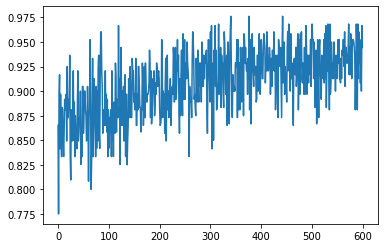

In [24]:
plt.plot(a['accuracy'])